# Analysis and Prediction Model of Fuel Consumption and Carbon Dioxide  Emissions of electric vehicle

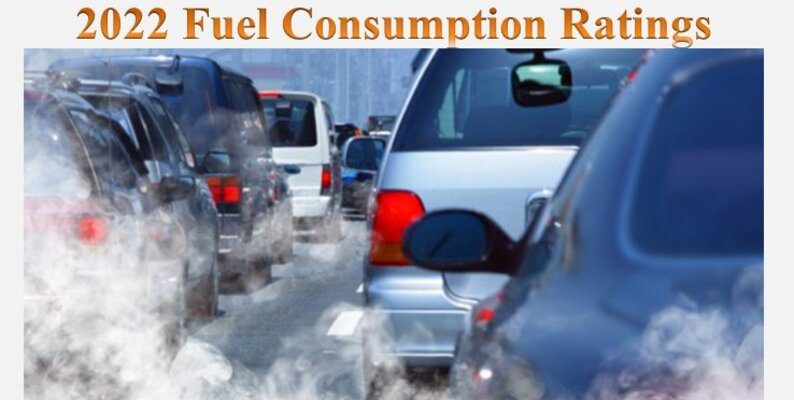

# import libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file 
import matplotlib.pyplot as plt # graphical representation
import seaborn as sns # statistical graphics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split # model validation process
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Load the Fuel Consumption dataset

In [2]:
import pandas as pd
fuel_data=pd.read_csv("MY2022 Fuel Consumption Ratings (1).csv")
fuel_data

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


In [2]:
fuel_data.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [2]:
fuel_data.tail()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5
945,2022,Volvo,XC90 T6 AWD,SUV: Standard,2.0,4,AS8,Z,12.4,8.9,10.8,26,252,5,7


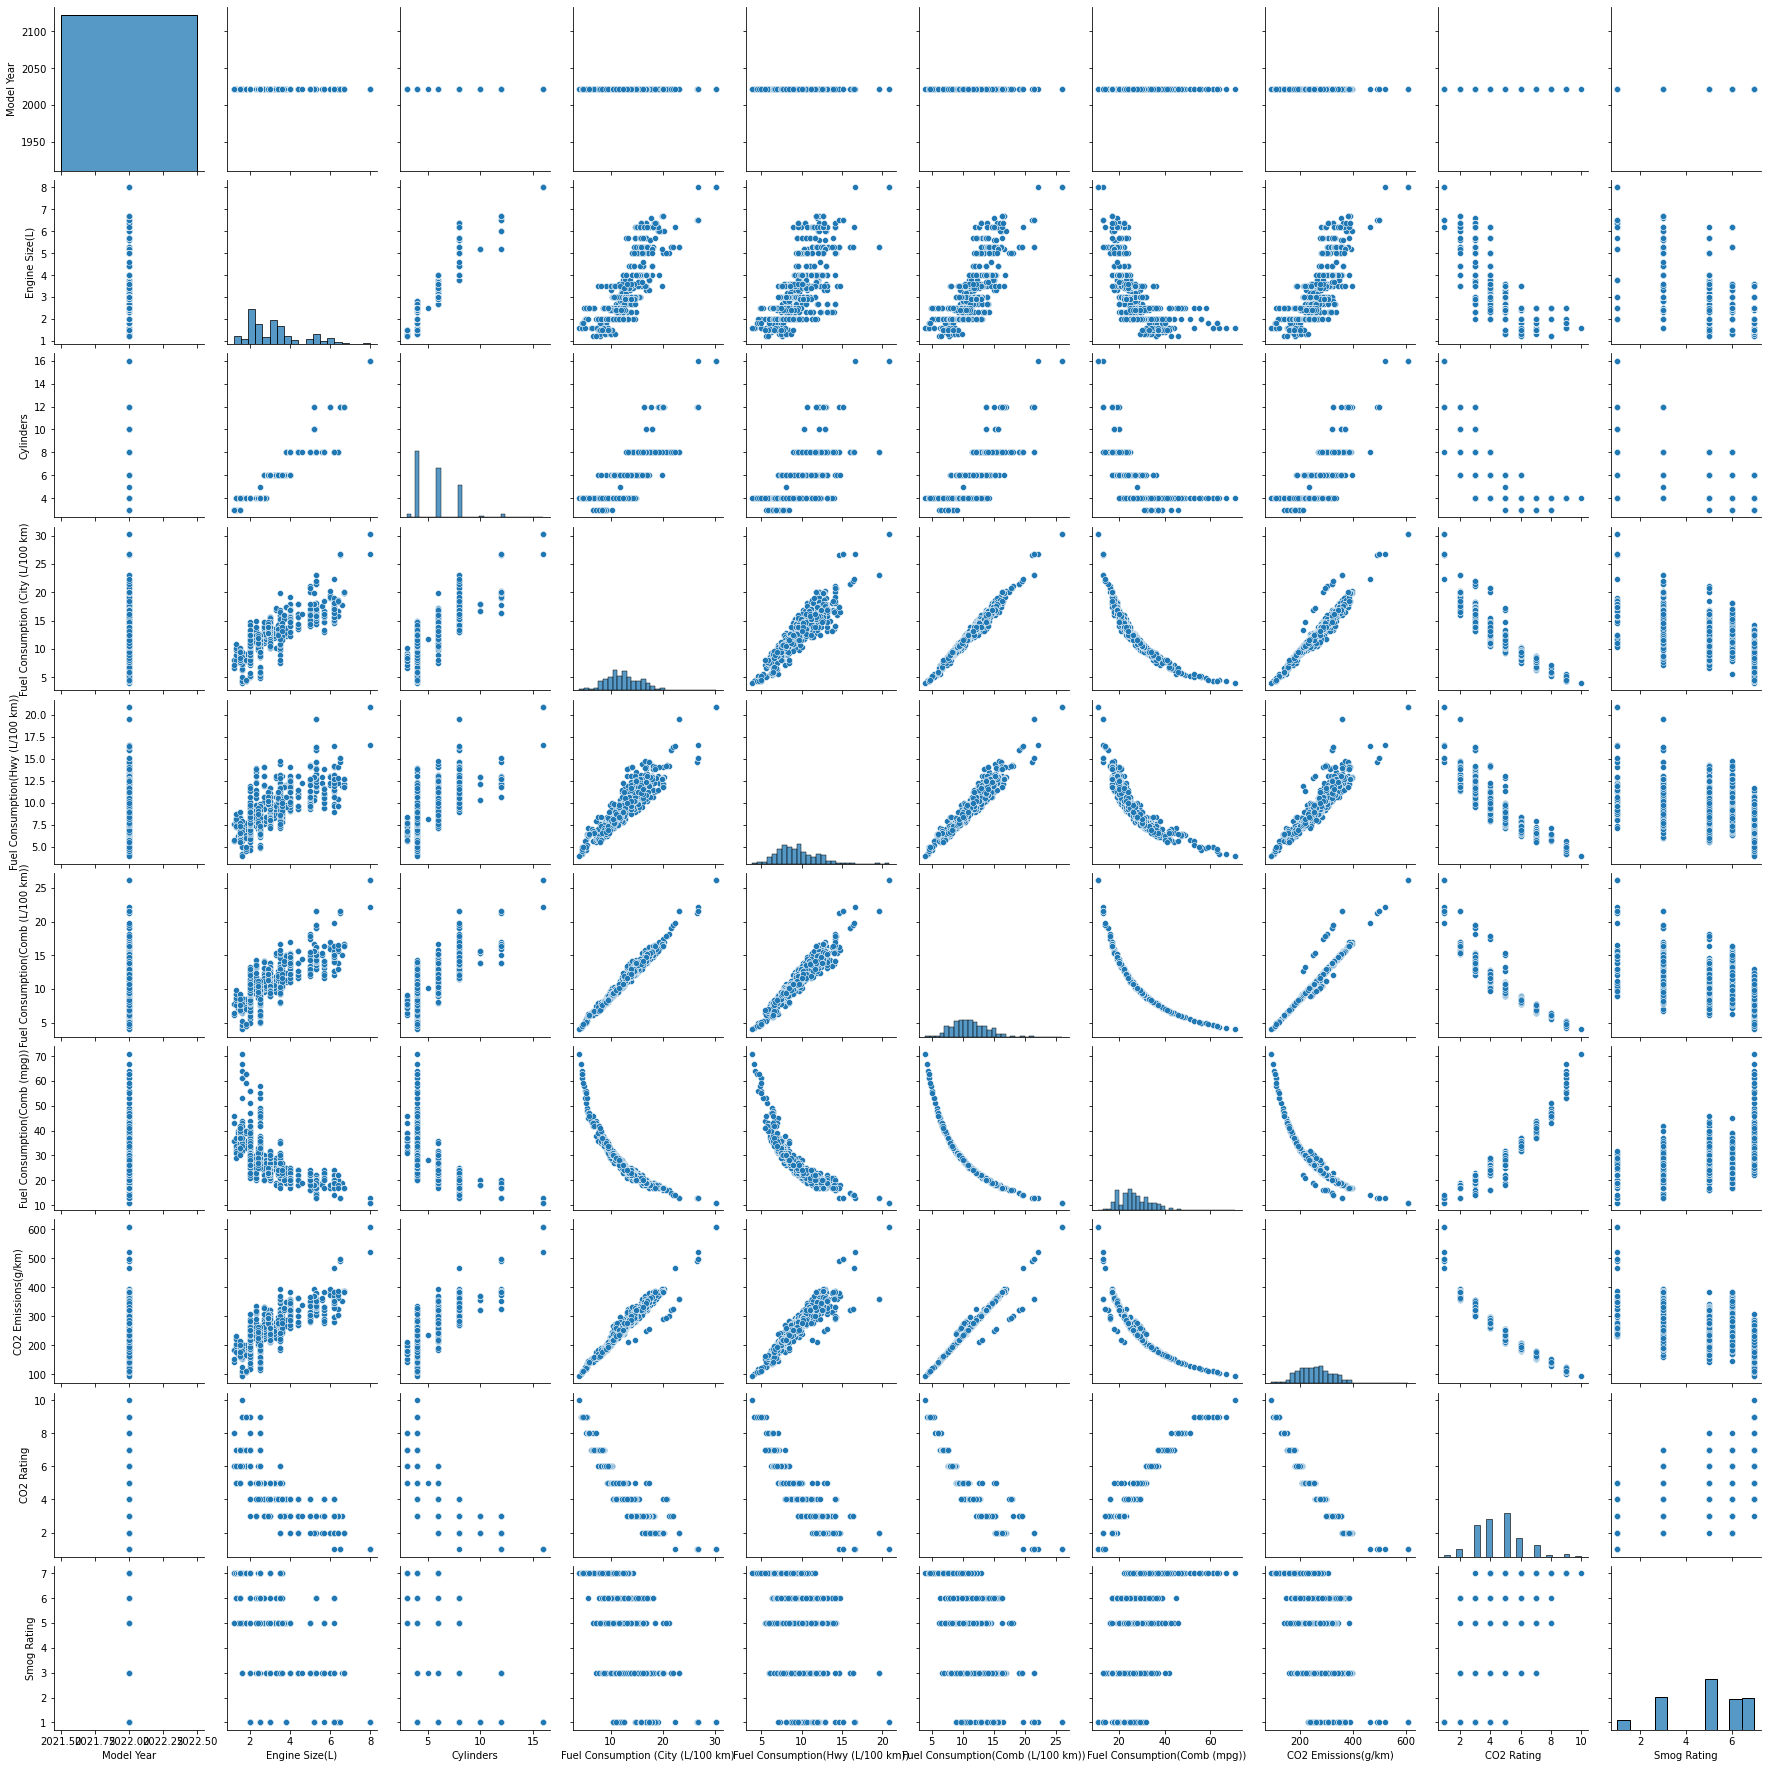

In [5]:
import seaborn as sns
sns.pairplot(fuel_data)

# exploratory data analysis

In [5]:
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [7]:
fuel_data.nunique()

Model Year                             1
Make                                  39
Model                                715
Vehicle Class                         14
Engine Size(L)                        36
Cylinders                              8
Transmission                          23
Fuel Type                              4
Fuel Consumption (City (L/100 km)    149
Fuel Consumption(Hwy (L/100 km))     107
Fuel Consumption(Comb (L/100 km))    131
Fuel Consumption(Comb (mpg))          49
CO2 Emissions(g/km)                  242
CO2 Rating                            10
Smog Rating                            5
dtype: int64

# Number of observation

In [13]:
len(fuel_data)

946

In [33]:
fuel_data.dtypes

Model Year                             int64
Make                                  object
Model                                 object
Vehicle Class                        float64
Engine Size(L)                       float64
Cylinders                              int64
Transmission                         float64
Fuel Type                            float64
Fuel Consumption (City (L/100 km)    float64
Fuel Consumption(Hwy (L/100 km))     float64
Fuel Consumption(Comb (L/100 km))    float64
Fuel Consumption(Comb (mpg))           int64
CO2 Emissions(g/km)                    int64
CO2 Rating                             int64
Smog Rating                            int64
dtype: object

# Data dimensions

In [9]:
print(f"Shape : {fuel_data.shape}")
print(" - ")
print(f"No. of features: {len(fuel_data.columns)}")
print(" - ")
print(f"List of features : {list(fuel_data.columns)}")

Shape : (946, 15)
 - 
No. of features: 15
 - 
List of features : ['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))', 'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))', 'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating']


# Missing value

In [7]:
print(f"Total no. of null values : {fuel_data.isnull().sum().sum()}")

Total no. of null values : 0


# Duplicated data

In [11]:
duplicate = fuel_data.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 0 duplicated rows in the data


# Dataset index

In [12]:
fuel_data.index

RangeIndex(start=0, stop=946, step=1)

# Counts of unique values

In [6]:
fuel_data['Model Year'].value_counts()

Ford             89
Chevrolet        80
Porsche          77
BMW              60
GMC              54
Toyota           51
Audi             45
Mercedes-Benz    43
Jeep             34
Hyundai          29
Lexus            28
Cadillac         26
Kia              25
Nissan           23
Honda            23
Mazda            23
Dodge            21
MINI             20
Subaru           19
Volkswagen       18
Land Rover       18
Ram              16
Maserati         13
Volvo            12
Buick             9
Acura             8
Lamborghini       8
Infiniti          8
Genesis           8
Bentley           8
Jaguar            8
Lincoln           7
Mitsubishi        7
Rolls-Royce       7
Alfa Romeo        6
Chrysler          6
Aston Martin      5
Bugatti           3
FIAT              1
Name: Make, dtype: int64

In [10]:
fuel_data['Make'].value_counts()

Ford             89
Chevrolet        80
Porsche          77
BMW              60
GMC              54
Toyota           51
Audi             45
Mercedes-Benz    43
Jeep             34
Hyundai          29
Lexus            28
Cadillac         26
Kia              25
Nissan           23
Honda            23
Mazda            23
Dodge            21
MINI             20
Subaru           19
Volkswagen       18
Land Rover       18
Ram              16
Maserati         13
Volvo            12
Buick             9
Acura             8
Lamborghini       8
Infiniti          8
Genesis           8
Bentley           8
Jaguar            8
Lincoln           7
Mitsubishi        7
Rolls-Royce       7
Alfa Romeo        6
Chrysler          6
Aston Martin      5
Bugatti           3
FIAT              1
Name: Make, dtype: int64

In [11]:
fuel_data['Model'].value_counts()

Silverado 4WD Mud Terrain Tire    5
Sierra 4WD                        5
Silverado 4WD                     5
Sierra 4WD Mud Terrain Tire       5
Mustang                           5
                                 ..
Ranger 4WD Tremor                 1
Shelby GT500 Mustang              1
G70 AWD                           1
G90 AWD                           1
XC90 T6 AWD                       1
Name: Model, Length: 715, dtype: int64

In [12]:
fuel_data['Vehicle Class'].value_counts()

SUV: Small                 197
SUV: Standard              141
Mid-size                   117
Pickup truck: Standard     113
Subcompact                  80
Compact                     69
Full-size                   64
Two-seater                  51
Minicompact                 48
Pickup truck: Small         20
Station wagon: Small        19
Special purpose vehicle     12
Station wagon: Mid-size      8
Minivan                      7
Name: Vehicle Class, dtype: int64

In [13]:
fuel_data['Engine Size(L)'].value_counts()

2.0    210
3.0    134
2.5     72
3.5     50
5.3     49
3.6     47
4.0     40
6.2     33
5.0     32
1.5     32
2.3     26
4.4     25
1.6     23
2.4     21
2.7     18
2.9     17
5.7     15
5.2     11
1.8      9
6.4      9
3.8      8
1.3      8
3.3      7
3.4      7
6.7      7
1.4      6
2.8      5
1.2      4
6.0      4
3.7      4
8.0      3
3.2      3
6.5      3
5.6      2
6.6      1
4.6      1
Name: Engine Size(L), dtype: int64

In [14]:
fuel_data['Cylinders'].value_counts()

4     404
6     295
8     197
3      21
12     17
10      8
16      3
5       1
Name: Cylinders, dtype: int64

In [15]:
fuel_data['Transmission'].value_counts()

AS8     212
A8      100
AS10     87
A10      72
M6       71
AM7      70
A9       65
AM8      52
AV       43
AS6      39
A6       24
AV8      23
AS9      19
M7       14
AV7      10
AM6      10
AV6       8
AV10      8
AS7       7
M5        5
AV1       4
AS5       2
A7        1
Name: Transmission, dtype: int64

In [16]:
fuel_data['Fuel Type'].value_counts()

Z    458
X    446
D     28
E     14
Name: Fuel Type, dtype: int64

# Label Encoding

In [36]:
z = fuel_data[['Vehicle Class', 'Transmission', 'Fuel Type','Make','Model']]

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
z = enc.fit_transform(z)
fuel_data[['Vehicle Class', 'Transmission', 'Fuel Type','Make','Model']] = pd.DataFrame(z)
fuel_data.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,0.0,349.0,0.0,2.4,4,7.0,3.0,9.9,7.0,8.6,33,200,6,3
1,2022,0.0,410.0,7.0,3.5,6,8.0,3.0,12.6,9.4,11.2,25,263,4,5
2,2022,0.0,513.0,7.0,2.0,4,8.0,3.0,11.0,8.6,9.9,29,232,5,6
3,2022,0.0,514.0,7.0,2.0,4,8.0,3.0,11.3,9.1,10.3,27,242,5,6
4,2022,0.0,615.0,0.0,2.0,4,8.0,3.0,11.2,8.0,9.8,29,230,5,7


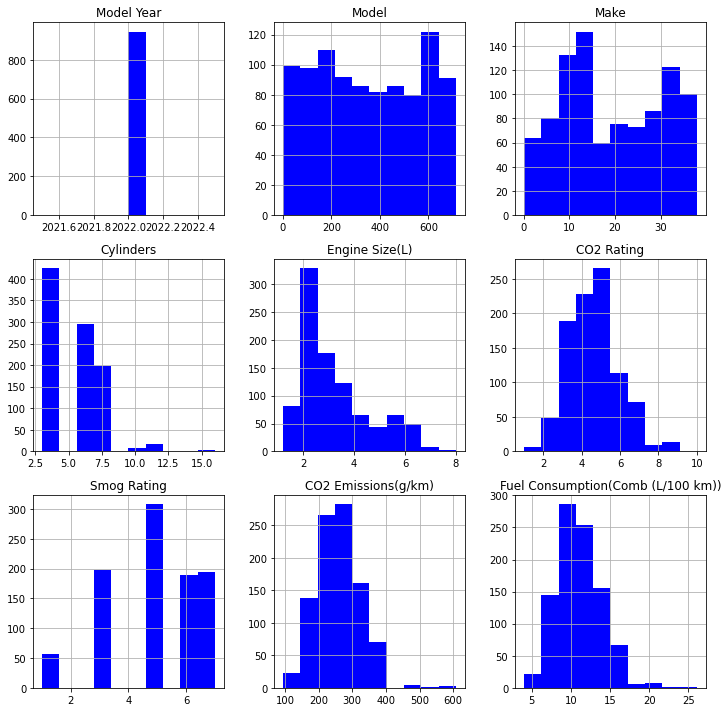

In [41]:
viz = fuel_data[['Model Year','Model','Make','Cylinders','Engine Size(L)','CO2 Rating', 'Smog Rating','CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))']]
viz.hist(color = 'Blue', figsize = (10, 10))
plt.tight_layout();
plt.show();

# Descriptive Statistical Analysis

In [3]:
fuel_data.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


Text(0, 0.5, 'Total Fuel Consumption')

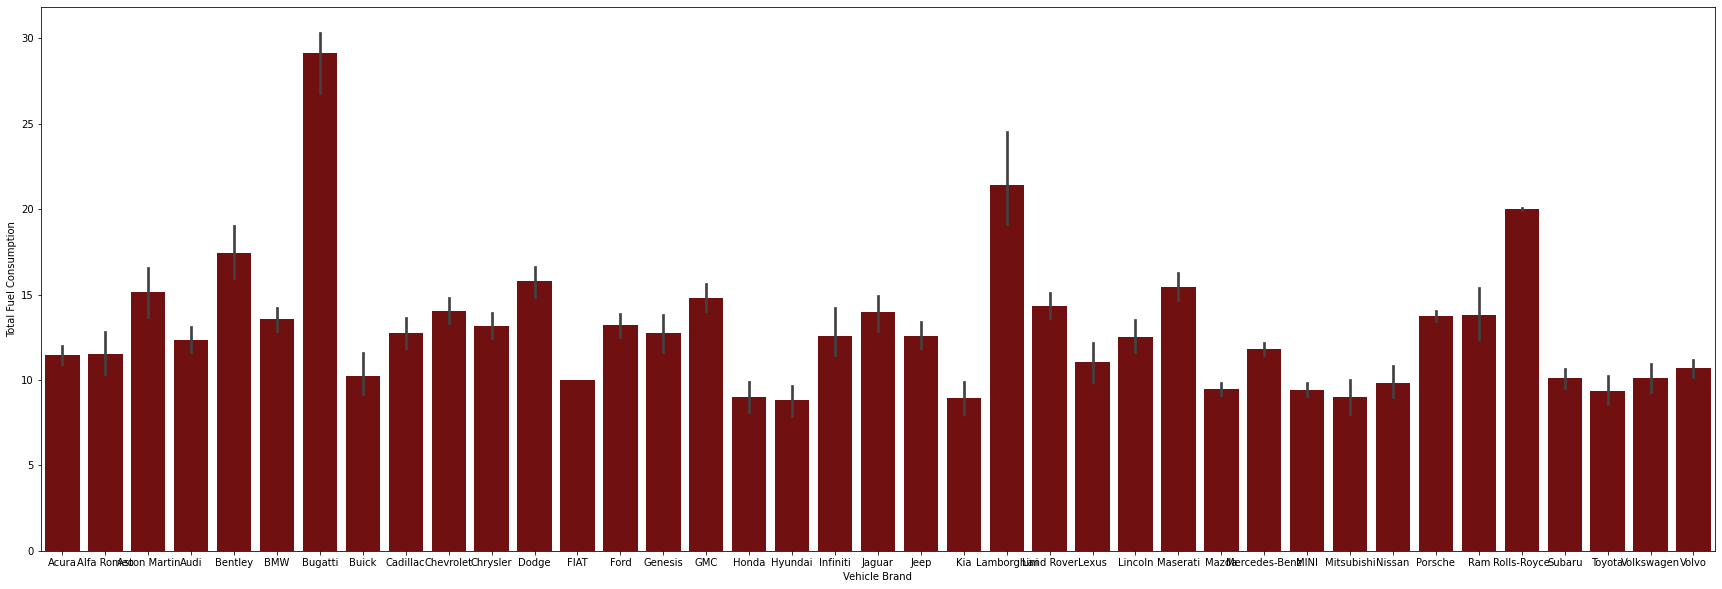

In [39]:
plt.figure(figsize=(30,10))
sns.barplot(x=fuel_data['Make'],y=fuel_data['Fuel Consumption (City (L/100 km)'],color="maroon")
plt.xlabel('Vehicle Brand')
plt.ylabel('Total Fuel Consumption')

Text(0, 0.5, 'Total CO2 Emissions(g/km')

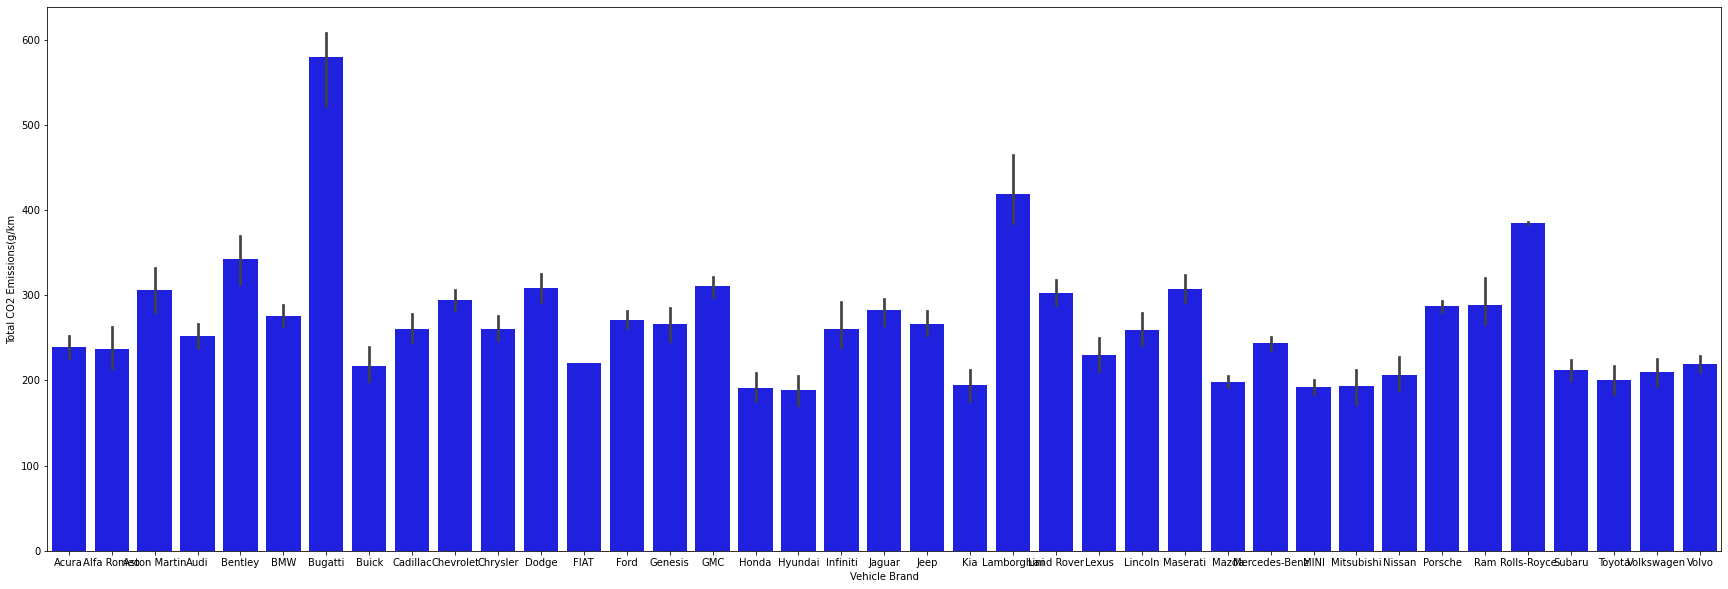

In [40]:
plt.figure(figsize=(30,10))
sns.barplot(x=fuel_data['Make'],y=fuel_data['CO2 Emissions(g/km)'],color="blue")
plt.xlabel('Vehicle Brand')
plt.ylabel('Total CO2 Emissions(g/km')


Text(0, 0.5, 'Avarege CO2 Rating')

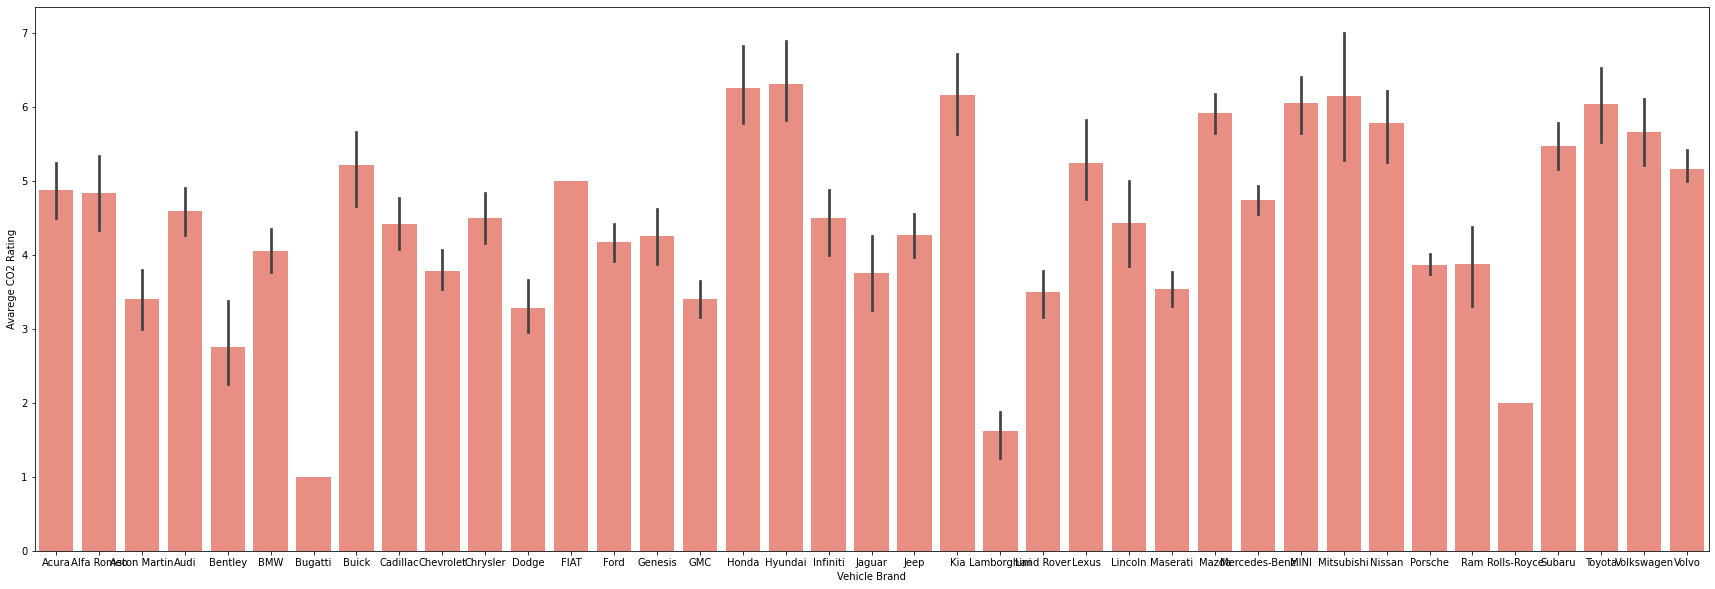

In [41]:
plt.figure(figsize=(30,10))
sns.barplot(x=fuel_data['Make'],y=fuel_data['CO2 Rating'],color="salmon")
plt.xlabel('Vehicle Brand')
plt.ylabel('Avarege CO2 Rating')

Text(0, 0.5, 'Avarege Smog Rating')

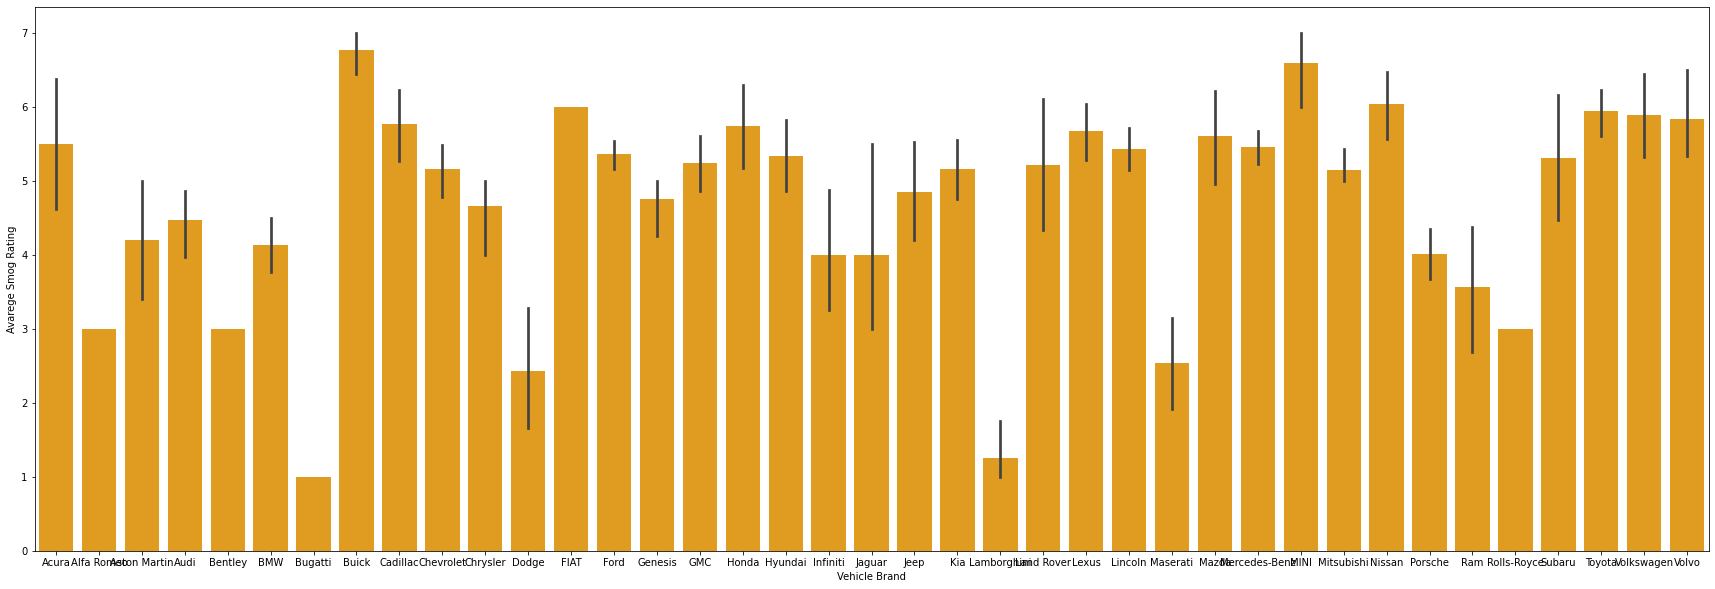

In [42]:
plt.figure(figsize=(30,10))
sns.barplot(x=fuel_data['Make'],y=fuel_data['Smog Rating'],color="orange")
plt.xlabel('Vehicle Brand')
plt.ylabel('Avarege Smog Rating')

In [68]:
fuel_data[['Model Year','Fuel Consumption (City (L/100 km)','CO2 Emissions(g/km)']].groupby(by ='Model Year').mean().sort_values(by='Fuel Consumption (City (L/100 km)',ascending=False)

,Fuel Consumption (City (L/100 km),CO2 Emissions(g/km)
Model Year,,
2022,12.506448,259.172304


In [69]:
fuel_data[['Make','Fuel Consumption (City (L/100 km)','CO2 Emissions(g/km)']].groupby(by ='Make').mean().sort_values(by='Fuel Consumption (City (L/100 km)',ascending=True)

,Fuel Consumption (City (L/100 km),CO2 Emissions(g/km)
Make,,
Hyundai,8.813793,188.827586
Kia,8.952000,194.200000
Honda,9.008696,191.608696
Mitsubishi,9.014286,193.571429
Toyota,9.366667,200.803922
MINI,9.415000,192.400000
Mazda,9.443478,198.391304
Nissan,9.847826,206.391304
FIAT,10.000000,221.000000


In [70]:
fuel_data[['Model','Fuel Consumption (City (L/100 km)','CO2 Emissions(g/km)']].groupby(by ='Model').mean().sort_values(by='Fuel Consumption (City (L/100 km)',ascending=False)

,Fuel Consumption (City (L/100 km),CO2 Emissions(g/km)
Model,,
Chiron Pur Sport,30.3,608.0
Chiron Super Sport,30.3,608.0
Aventador Coupe,26.8,498.0
Aventador Roadster,26.8,498.0
Chiron,26.8,522.0
...,...,...
Niro FE,4.4,110.0
Niro,4.4,110.0
Corolla Hybrid,4.4,106.0


In [54]:
fuel_data[['Vehicle Class','Fuel Consumption (City (L/100 km)','CO2 Emissions(g/km)']].groupby(by ='Vehicle Class').mean().sort_values(by='Fuel Consumption (City (L/100 km)',ascending=False)

,Fuel Consumption (City (L/100 km),CO2 Emissions(g/km)
Vehicle Class,,
Two-seater,15.235294,307.254902
Pickup truck: Standard,15.076991,309.407080
SUV: Standard,14.382979,302.326241
Station wagon: Mid-size,14.262500,285.375000
Minicompact,13.610417,280.208333
Full-size,12.628125,256.734375
Pickup truck: Small,12.435000,270.050000
Subcompact,12.291250,248.175000
Special purpose vehicle,11.783333,237.500000


In [62]:
fuel_data[['Engine Size(L)','Fuel Consumption (City (L/100 km)','CO2 Emissions(g/km)']].groupby(by ='Engine Size(L)').mean().sort_values(by='Fuel Consumption (City (L/100 km)',ascending=False)

,Fuel Consumption (City (L/100 km),CO2 Emissions(g/km)
Engine Size(L),,
8.0,29.133333,579.333333
6.5,26.700000,495.000000
6.7,19.985714,385.285714
6.0,19.525000,382.500000
6.6,17.800000,354.000000
5.2,17.627273,352.545455
5.6,17.500000,358.500000
6.2,17.090909,349.848485
5.3,16.904082,339.571429


In [63]:
fuel_data[['Cylinders','Fuel Consumption (City (L/100 km)','CO2 Emissions(g/km)']].groupby(by ='Cylinders').mean().sort_values(by='Fuel Consumption (City (L/100 km)',ascending=False)

,Fuel Consumption (City (L/100 km),CO2 Emissions(g/km)
Cylinders,,
16,29.133333,579.333333
12,20.511765,394.941176
10,17.650000,354.750000
8,16.383756,328.654822
6,12.941356,271.230508
5,11.700000,235.000000
4,9.952228,210.646040
3,8.385714,180.619048


In [66]:
fuel_data[['Transmission','Fuel Consumption (City (L/100 km)','CO2 Emissions(g/km)']].groupby(by ='Transmission').mean().sort_values(by='Fuel Consumption (City (L/100 km)',ascending=False)

,Fuel Consumption (City (L/100 km),CO2 Emissions(g/km)
Transmission,,
A6,15.550000,302.083333
A10,14.891667,321.083333
AS5,14.850000,322.000000
A8,13.875000,287.060000
M7,13.785714,289.142857
AS10,13.665517,278.597701
AM8,13.555769,281.173077
AS7,13.357143,276.000000
AM7,13.124286,267.928571


In [71]:
fuel_data[['Fuel Type','Fuel Consumption (City (L/100 km)','CO2 Emissions(g/km)']].groupby(by ='Fuel Type').mean().sort_values(by='Fuel Consumption (City (L/100 km)',ascending=False)

,Fuel Consumption (City (L/100 km),CO2 Emissions(g/km)
Fuel Type,,
E,19.864286,294.857143
Z,13.603930,278.349345
D,11.282143,271.571429
X,11.225336,237.580717


# Inferential Statistics

In [ ]:
t-Test
Correlation

# t-Test

#Null Hypothesis(HO):mean of fuel consuption in the city = mean of fuel consuption in highway;

#Alternative Hypothesis(Ha):mean of fuel consuption in the city is not equal to mean of fuel consuption in highway;    

In [25]:
fuel_data['Fuel Consumption (City (L/100 km)'].mean()

12.506448202959833

In [26]:
fuel_data['Fuel Consumption(Hwy (L/100 km))'].mean()

9.363319238900631

In [2]:
fuel_data[['Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))']].describe()

,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km))
count,946.000000,946.000000
mean,12.506448,9.363319
std,3.452043,2.285125
min,4.000000,3.900000
25%,10.200000,7.700000
50%,12.200000,9.200000
75%,14.700000,10.700000
max,30.300000,20.900000


In [6]:
from scipy import stats
stats.shapiro(fuel_data['Fuel Consumption (City (L/100 km)'])


ShapiroResult(statistic=0.9695931077003479, pvalue=3.66480175199857e-13)

In [9]:
from scipy import stats
stats.shapiro(fuel_data['Fuel Consumption(Hwy (L/100 km))'])


ShapiroResult(statistic=0.9647088050842285, pvalue=2.328294519259467e-14)

In [12]:
from scipy import stats
stats.shapiro(fuel_data['Fuel Consumption (City (L/100 km)'])
stats.shapiro(fuel_data['Fuel Consumption(Hwy (L/100 km))'])
stats.ttest_rel(fuel_data['Fuel Consumption (City (L/100 km)'], fuel_data['Fuel Consumption(Hwy (L/100 km))'])

Ttest_relResult(statistic=60.1994210068558, pvalue=0.0)

# Correlation

In [4]:
fuel_data.corr()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
Model Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine Size(L),NaN,1.000000,0.920698,0.834925,0.749374,0.818694,-0.704163,0.824188,-0.766333,-0.448239
Cylinders,NaN,0.920698,1.000000,0.845688,0.737652,0.821718,-0.693594,0.833241,-0.762157,-0.502149
Fuel Consumption (City (L/100 km),NaN,0.834925,0.845688,1.000000,0.922850,0.990321,-0.909477,0.965632,-0.920524,-0.523928
Fuel Consumption(Hwy (L/100 km)),NaN,0.749374,0.737652,0.922850,1.000000,0.967138,-0.877531,0.933991,-0.894668,-0.402099
Fuel Consumption(Comb (L/100 km)),NaN,0.818694,0.821718,0.990321,0.967138,1.000000,-0.914305,0.971671,-0.927705,-0.490473
Fuel Consumption(Comb (mpg)),NaN,-0.704163,-0.693594,-0.909477,-0.877531,-0.914305,1.000000,-0.913019,0.949561,0.473990
CO2 Emissions(g/km),NaN,0.824188,0.833241,0.965632,0.933991,0.971671,-0.913019,1.000000,-0.954593,-0.520437
CO2 Rating,NaN,-0.766333,-0.762157,-0.920524,-0.894668,-0.927705,0.949561,-0.954593,1.000000,0.502625
Smog Rating,NaN,-0.448239,-0.502149,-0.523928,-0.402099,-0.490473,0.473990,-0.520437,0.502625,1.000000


In [5]:
fuel_data.drop(['Model Year'], axis = 1).corr()

,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
Engine Size(L),1.000000,0.920698,0.834925,0.749374,0.818694,-0.704163,0.824188,-0.766333,-0.448239
Cylinders,0.920698,1.000000,0.845688,0.737652,0.821718,-0.693594,0.833241,-0.762157,-0.502149
Fuel Consumption (City (L/100 km),0.834925,0.845688,1.000000,0.922850,0.990321,-0.909477,0.965632,-0.920524,-0.523928
Fuel Consumption(Hwy (L/100 km)),0.749374,0.737652,0.922850,1.000000,0.967138,-0.877531,0.933991,-0.894668,-0.402099
Fuel Consumption(Comb (L/100 km)),0.818694,0.821718,0.990321,0.967138,1.000000,-0.914305,0.971671,-0.927705,-0.490473
Fuel Consumption(Comb (mpg)),-0.704163,-0.693594,-0.909477,-0.877531,-0.914305,1.000000,-0.913019,0.949561,0.473990
CO2 Emissions(g/km),0.824188,0.833241,0.965632,0.933991,0.971671,-0.913019,1.000000,-0.954593,-0.520437
CO2 Rating,-0.766333,-0.762157,-0.920524,-0.894668,-0.927705,0.949561,-0.954593,1.000000,0.502625
Smog Rating,-0.448239,-0.502149,-0.523928,-0.402099,-0.490473,0.473990,-0.520437,0.502625,1.000000


In [6]:
fuel_data.drop(['Model Year'], axis = 1).corr().unstack().sort_values(ascending = False).drop_duplicates()

Engine Size(L)                     Engine Size(L)                       1.000000
Fuel Consumption (City (L/100 km)  Fuel Consumption(Comb (L/100 km))    0.990321
Fuel Consumption(Comb (L/100 km))  CO2 Emissions(g/km)                  0.971671
                                   Fuel Consumption(Hwy (L/100 km))     0.967138
CO2 Emissions(g/km)                Fuel Consumption (City (L/100 km)    0.965632
CO2 Rating                         Fuel Consumption(Comb (mpg))         0.949561
Fuel Consumption(Hwy (L/100 km))   CO2 Emissions(g/km)                  0.933991
                                   Fuel Consumption (City (L/100 km)    0.922850
Cylinders                          Engine Size(L)                       0.920698
                                   Fuel Consumption (City (L/100 km)    0.845688
Fuel Consumption (City (L/100 km)  Engine Size(L)                       0.834925
Cylinders                          CO2 Emissions(g/km)                  0.833241
CO2 Emissions(g/km)         

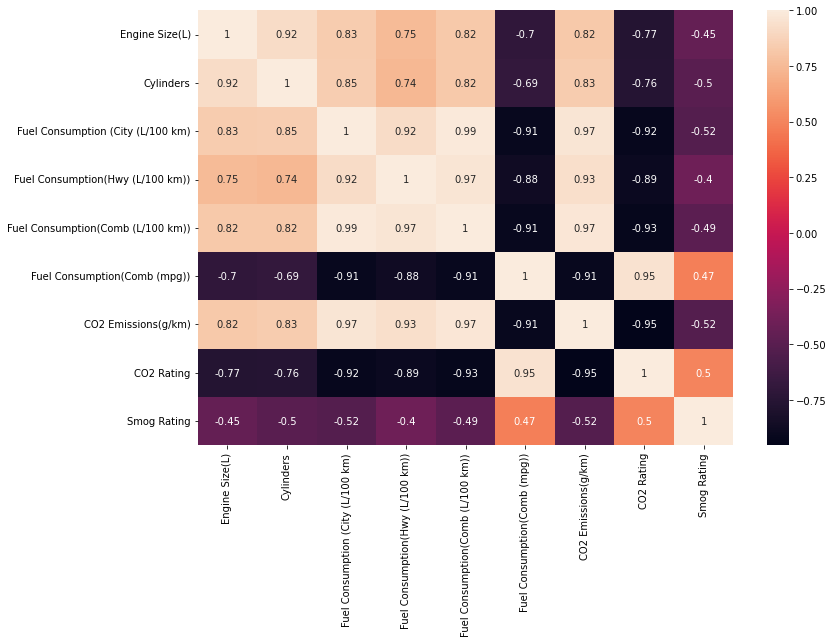

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(fuel_data.drop(['Model Year'],axis=1).corr(), annot = True);

# Mechine Learning

# Prediction for CO2 Emissions

# LinearRegression

R2 score: 0.9602858604501217


C:\Users\ELCOT\AppData\Local\Temp\ipykernel_5616\914706683.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(y_test,y_test,'r', label="Perfect Prediction", color='blue')


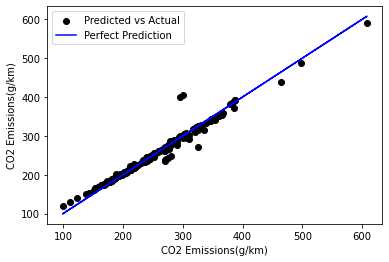

In [20]:
from sklearn.linear_model import LinearRegression
x = fuel_data[['Engine Size(L)', 'Cylinders','Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Comb (L/100 km))']]
y = fuel_data['CO2 Emissions(g/km)']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
regr=LinearRegression()
regr.fit(x_train,y_train)
Y_regr= regr.predict(x_test)
regr_score = r2_score(y_test, Y_regr)
print('R2 score:',regr.score(x_test,y_test))
# Final predictions
plt.scatter( y_test, Y_regr,label="Predicted vs Actual", color='black')

# Perfect predictions
plt.xlabel('CO2 Emissions(g/km)')
plt.ylabel('CO2 Emissions(g/km)')
plt.plot(y_test,y_test,'r', label="Perfect Prediction", color='blue')
plt.legend();

# DecisionTreeRegressor

In [10]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
Y_dtr= dtr.predict(x_test)
dtr_score = r2_score(y_test, Y_dtr)
print('R2 score:',dtr.score(x_test,y_test))

R2 score: 0.9670106207886308


# RandomForestRegressor

In [11]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
Y_rfr= rfr.predict(x_test)
rfr_score = r2_score(y_test, Y_rfr)
print('R2 score:',rfr.score(x_test,y_test))

R2 score: 0.9734955383613298


In [31]:
log = pd.DataFrame({
    'CO2_Prediction' : ['Linear Regression', 'Decision Tree', 'RandomForestRegressor'],
    'R2 Score' : [0.96028,0.96755,0.97386 ]
})
log

,CO2_Prediction,R2 Score
0,Linear Regression,0.96028
1,Decision Tree,0.96755
2,RandomForestRegressor,0.97386


(0.0, 1.0)

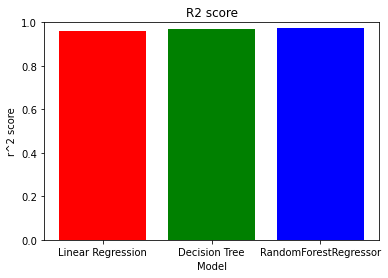

In [32]:
plt.title('R2 score')
plt.bar(log['CO2_Prediction'],log['R2 Score'], color = ['r','g','b'])
plt.xlabel('Model')
plt.ylabel('r^2 score')
plt.ylim(0, 1)

# Prediction for Fuel Consumption

# LinearRegression

R2 score: 0.963964799667796


C:\Users\ELCOT\AppData\Local\Temp\ipykernel_9528\3552882219.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(y_test,y_test,'r', label="Perfect Prediction", color='blue')


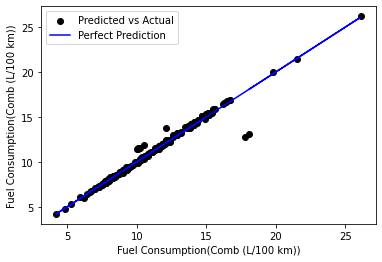

In [69]:
from sklearn.linear_model import LinearRegression
x = fuel_data[['Engine Size(L)', 'Transmission','CO2 Emissions(g/km)', 'Smog Rating']]
y = fuel_data['Fuel Consumption(Comb (L/100 km))']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
regr=LinearRegression()
regr.fit(x_train,y_train)
Y_regr= regr.predict(x_test)
regr_score = r2_score(y_test, Y_regr)
print('R2 score:',regr.score(x_test,y_test))
# Final predictions
plt.scatter( y_test, Y_regr,label="Predicted vs Actual", color='black')

# Perfect predictions
plt.xlabel('Fuel Consumption(Comb (L/100 km))')
plt.ylabel('Fuel Consumption(Comb (L/100 km))')
plt.plot(y_test,y_test,'r', label="Perfect Prediction", color='blue')
plt.legend();



# DecisionTreeRegressor

In [13]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
Y_dtr= dtr.predict(x_test)
dtr_score = r2_score(y_test, Y_dtr)
print('R2 score:',dtr.score(x_test,y_test))


R2 score: 0.9268641709023833


# RandomForestRegressor

In [14]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
Y_rfr= rfr.predict(x_test)
r2 = r2_score(y_test, Y_rfr)
print('R2 score:',rfr.score(x_test,y_test))

R2 score: 0.9472425460514721


In [27]:
log = pd.DataFrame({
    'FuelConsumption_Prediction' : ['Linear Regression', 'Decision Tree', 'RandomForestRegressor'],
    'R2 Score' : [0.96396,0.92727,0.95008 ]
})
log

,FuelConsumption_Prediction,R2 Score
0,Linear Regression,0.96396
1,Decision Tree,0.92727
2,RandomForestRegressor,0.95008


(0.0, 1.0)

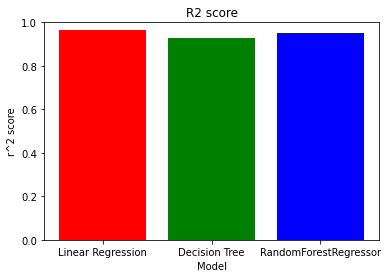

In [29]:
plt.title('R2 score')
plt.bar(log['FuelConsumption_Prediction'],log['R2 Score'], color = ['r','g','b'])
plt.xlabel('Model')
plt.ylabel('r^2 score')
plt.ylim(0, 1)